In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_moons

### Data importing and preprocessing

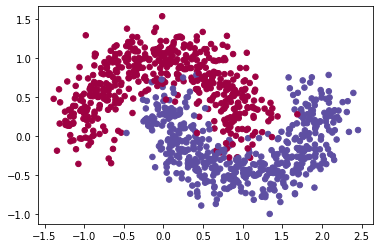

In [65]:
np.random.seed(0)
X, y = make_moons(1000, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=30, c=y, cmap=plt.cm.Spectral)

In [66]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [67]:
# Scaling the input data
X_min_c0 = (X.iloc[:, 0].min())
X_min_c1 = (X.iloc[:, 1].min())

X_max_c0 = (X.iloc[:, 0].max())
X_max_c1 = (X.iloc[:, 1].max())

In [68]:
X.iloc[:, 0] = (X.iloc[:, 0] - X_min_c0) / (X_max_c0 - X_min_c0) 
X.iloc[:, 1] = (X.iloc[:, 1] - X_min_c1) / (X_max_c1 - X_min_c1) 

In [69]:
X.head(5)

,0,1
0,0.904103,0.620507
1,0.830766,0.396929
2,0.301526,0.620465
3,0.295244,0.468184
4,0.471587,0.230856


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [72]:
print(y_train.shape)

(800, 1)


In [73]:
print(X_train.head(5))
print(y_train.head(5))

            0         1
735  0.582560  0.227882
289  0.369629  0.874809
806  0.546176  0.658932
568  0.585356  0.461676
42   0.460095  0.331475
     0
735  1
289  0
806  0
568  0
42   1


In [74]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## Modelling and Computation part

In [75]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [76]:
def sigmoid_prime(z):           # Derivative of sigmoid
    return sigmoid(z)*(1-sigmoid(z))

In [77]:
def feedforward(X, wt, bias): # X_train(800 X 2), y_train(800 X 1)
    z = np.dot(wt, X) + bias
    y_pred = sigmoid(z)
    return y_pred
        

In [142]:
layers = [2, 2, 1] # number of neurons in (i)ip layer=2, (ii)hidden layer=3, (iii)output layer=2
num_of_layers = 2

w1 = np.random.randn(layers[1], layers[0]) # layer 1, Wij = h X i 
w2 = np.random.randn(layers[2], layers[1]) # layer 2, Wjk = o X h
b1 = np.zeros((layers[1], 1)) # biases on hidden nodes, Bj = h X 1 
b2 = np.zeros((layers[2], 1)) # biases on output node, Bk = o X 1 
print(w1)
print(w2)
print(b1)
print(b2)



[[-0.43409002  0.2302278 ]
 [ 0.62930105  0.53078887]]
[[ 0.2934831  -0.68922193]]
[[0.]
 [0.]]
[[0.]]


In [143]:
def NN_model(X_train, y_train, alpha):

    global w1, w2, b1, b2
    
    #Stochastic Batch Gradient descent
    activations_ls = [] 
    x = X_train.T # x: 2 X 1 
       
    # Forward propagation
    # Finding activation in each layer
    x1 = feedforward(x, w1, b1) 
    activations_ls.append(x1)
    x2 = feedforward(x1, w2, b2)
    activations_ls.append(x2)

    # Calculating error to propagate back
    op_error = y_train - activations_ls[num_of_layers-1]
            
    # # Gradient Descent updation
    # Calculate gradient for jk layer
    gradient2 = sigmoid_prime(activations_ls[num_of_layers-1])
    gradient2 = op_error * gradient2
    gradient2 = alpha * gradient2
    # Calculate deltas
    dWjk = np.dot(gradient2, activations_ls[0].T)
    # Adjust the weights and biases on h-op layer by deltas
    w2 = w2 + dWjk
    b2 = b2 + gradient2

    # Calculate errors and gradient for ij layer
    hid_error = np.dot(w2.T, op_error)
    # Calculate hidden gradient
    gradient1 = sigmoid_prime(activations_ls[0])
    gradient1 = hid_error * gradient1
    gradient1 = alpha * gradient1
    # Calculate deltas
    dWij = np.dot(gradient1, X_train)
    # Adjust the weights and biases on ip-h layer by deltas
    w1 = w1 + dWij
    b1 = b1 + gradient1

   
    

In [144]:
X_arr = X_train.to_numpy().reshape(len(X_train), 2)
y_arr = y_train.to_numpy().reshape(len(y_train), 1)


In [145]:
# Using stochastic gradient descent

for i in range(2200):
    for i in range(len(X_arr)):
        NN_model(X_arr[i].reshape(1, 2), y_arr[i].reshape(1, 1), 0.0248)


In [146]:
print("My model")
print(w1)
print(w2)
print(b1)
print(b2)

My model
[[ 162.42001433 -288.37034105]
 [-215.49776539  356.40788746]]
[[ 1.69641935 -3.11971378]]
[[  5.04869673]
 [-10.56266926]]
[[1.91199483]]


## Predicting and Testing

In [147]:
X_t = X_test.to_numpy().reshape(len(X_test), 2)
y_t = y_test.to_numpy().T[0] # 1 X 200
y_t = y_t.tolist()


In [148]:
pred_y_ls= []
    # Forward propagation
for ips in X_t:
    inp = ips.reshape(1, 2).T
        
    act1 = feedforward(inp, w1, b1)
    act2 = feedforward(act1, w2, b2)
    if act2.item(0, 0) >= 0.5:
        pred_y_ls.append(1)
    else:
        pred_y_ls.append(0)



In [149]:
print(pred_y_ls)
print(y_t)

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,

In [151]:
trues = 0
for i in range(len(y_t)):
    if (y_t[i] == pred_y_ls[i]):
        trues += 1
print("Accuracy: ", ((trues / len(y_t)) * 100))

154
Accuracy:  77.0
